# Day 2: Value Function, and Finding the Optimal Policy


To solve a reinforcement learning task, we aim to find a policy that maximizes the cumulative reward in the long run. In the case of finite Markov Decision Processes (MDPs), we can precisely define an optimal policy based on the concept of value functions. Value functions provide a way to compare and order policies.

We say that one policy is better than or equal to another policy if, for all states, the expected return (cumulative reward) under the first policy is greater than or equal to the expected return under the second policy. In other words, policy A is better than or equal to policy B if, for all states, the expected return of A is greater than or equal to the expected return of B.

There is always at least one policy that is better than or equal to all other policies. This policy is known as the optimal policy. While there may be multiple optimal policies, they all share the same state-value function, denoted as V*. The optimal state-value function represents the expected return under the optimal policy for each state.

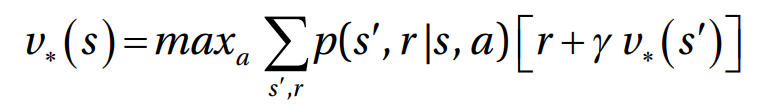

In summary, the goal is to find an optimal policy that maximizes the expected return, and all optimal policies have the same state-value function V*.



to read more about finding the optimal value function: [Optimal Vlaue Function](http://incompleteideas.net/book/ebook/node35.html)

# Gridwold Example

We will start with the gridworld example explained in class. The optimal value function is given, and your goal is to write code for an optimal policy using the given optimal value function.

 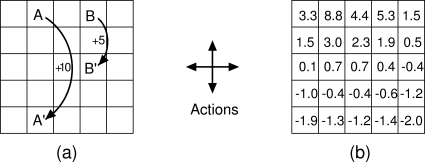

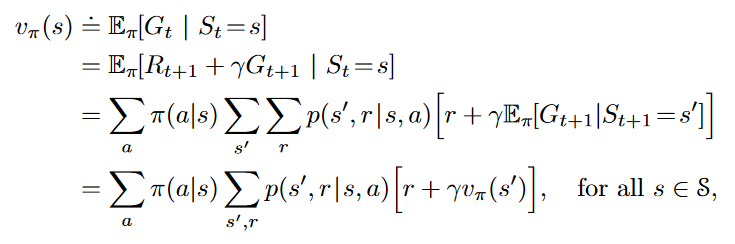

which mean the author of the [book](http://incompleteideas.net/book/the-book-2nd.html) had to solve for 25 equations with 25 unknows to obtain these values. Following the same procedure, we can obtain the optimum value function by solving the Bellman optimality equation:

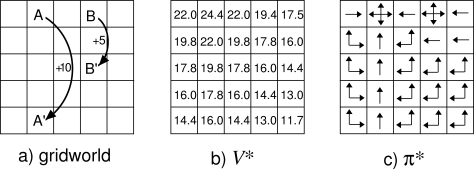

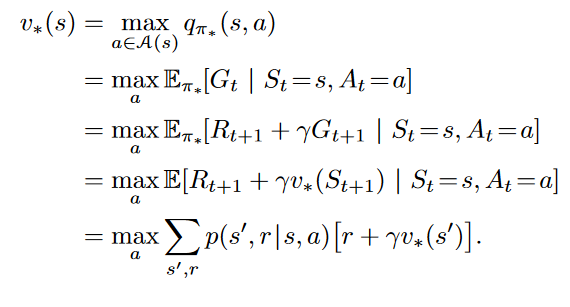

In this notebook you will be given the V*, and your task is to write a policy that utilze the optimum value function to reach the goal (optimum policy).  However, if you are so eager to know how to obtain the values on the 2D examples above, check the following [source](https://realdiganta.medium.com/coding-the-gridworld-example-from-deepminds-reinforcement-learning-course-in-python-17d74335fcbc).

# Value function in 2D gridworld

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
import matplotlib


class GridworldEnvironment:
    def __init__(self):
        self.grid_world = np.zeros((5, 5))
        self.grid_world[4, 1] = 10  # Position A
        self.grid_world[2, 3] = 5   # Position B
        self.current_state = (0, 0)

    def step(self, action):
        i, j = self.current_state
        if action == 'up':
            next_state = (i - 1, j)
        elif action == 'down':
            next_state = (i + 1, j)
        elif action == 'left':
            next_state = (i, j - 1)
        elif action == 'right':
            next_state = (i, j + 1)
        else:
            raise ValueError()

        if next_state == (0, 1):
            next_state = (4, 1)  # Transition to position A
            reward = 10
        elif next_state == (4, 1):
            reward = 10
        elif next_state == (0, 3):
            next_state = (2, 3)  # Transition to position B
            reward = 5
        elif next_state == (2, 3):
            reward = 5

        elif next_state[0] < 0 or next_state[0] >= 5 or next_state[1] < 0 or next_state[1] >= 5:
            # Stay at the same position if action moves outside the grid
            next_state = self.current_state
            reward = -1
        else:
            reward = 0

        self.current_state = next_state
        return next_state, reward

In [2]:
# Function to evaluate a policy in an environment
value_function =  np.array([22, 24, 22, 19.4, 17.5, 19.8, 22, 19.9, 17.8, 16, 17.8, 19.8, 17.8, 16, 14.4, 16, 17.8, 16, 14.4, 13, 14.4, 16, 14.4, 13, 11.7]).reshape(5,5)

def evaluate_policy_on_grid_world(policy, num_episodes=1000):
    rewards = []
    for _ in range(num_episodes):
        env = GridworldEnvironment()
        state = env.current_state
        episode_reward = 0
        for _ in range(100):
            actions = policy(state, value_function)
            for a in actions:
                a = num_action_to_text(a)
                next_state, reward = env.step(a)
                episode_reward += reward
                state = next_state
        rewards.append(episode_reward)
    return sum(rewards) / num_episodes

def num_action_to_text(action):
    if action == 0:
        return 'right'
    elif action == 1:
        return 'down'
    elif action == 2:
        return 'left'
    elif action == 3:
        return 'up'
    else:
        raise ValueError()

In [3]:
# Create an instance of the GridworldEnvironment
env = GridworldEnvironment()

# Take a step in the environment
action = 'right'
next_state, reward = env.step(action)

print("Next State:", next_state)
print("Reward:", reward)

Next State: (4, 1)
Reward: 10


Note the code above is only used for policy evaluation. The helper functions are taken from : [github](https://github.com/Eligijus112/rl-snake-game)

In [4]:
# Before starting, these are helper functions, you don't have to understand/read, but you must run them

# helper functions
def test_policy(policy):
  my_dict = {key: None for key in range(25)}
  for i in range (25):
    action = policy(i,value_function)
    if (len(action) == 4):
      my_dict[i] = {'up': 0.25, 'down': 0.25, 'left': 0.25, 'right': 0.25}
    elif ((len(action) == 3)):
      dir = num2text(action)
      my_dict[i] = {dir[0]: 0.333, dir[1]: 0.333, dir[2]: 0.333}
    elif(len(action) == 2):
      dir = num2text(action)
      my_dict[i] = {dir[0]: 0.5,dir[1]: 0.5}
    else:
      dir = num2text(action)
      my_dict[i] = {dir[0]:1}


  return my_dict

def num2text(action):
  text = list()
  for i in action:
    if (i == 0):
      text.append("right")
    elif(i==1):
      text.append("down")
    elif(i==2):
      text.append("left")
    else :
      text.append("up")
  return text




def plot_policy_matrix(P: dict, S:np.array, goal_coords: list = [], img_width: int = 5, img_height: int = 5, title: str = None) -> None:
    """
    Plots the policy matrix out of the dictionary provided; The dictionary values are used to draw the arrows
    """
    height, width = S.shape

    fig = plt.figure(figsize=(img_width, img_width))
    ax = fig.add_subplot(111, aspect='equal')
    for y in range(height):
        for x in range(width):
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)

            # If there is a tuple of (x, y) in the goal_coords list, we color the cell gray
            if (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='gray'))

            else:
                # Adding the arrows to the plot
                if 'up' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0, 0.3, head_width = 0.05, head_length = 0.05)
                if 'down' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0, -0.3, head_width = 0.05, head_length = 0.05)
                if 'left' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, -0.3, 0, head_width = 0.05, head_length = 0.05)
                if 'right' in P[S[x, y]]:
                    plt.arrow(matplot_x, matplot_y, 0.3, 0, head_width = 0.05, head_length = 0.05)


    offset = .5
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)

    plt.title(title)

def array_index_to_matplot_coords(i: int, j: int, n_cols: int) -> Tuple[int, int]:
    """Converts an array index to a matplot coordinate"""
    x = j
    y = n_cols - i - 1
    return x, y

def plot_matrix(
    M: np.array,
    goal_coords: list = [],
    img_width: int = 5,
    img_height: int = 5,
    title: str = None,
    annotate_goal: bool = True
    ) -> None:
    """
    Plots a matrix as an image.
    """
    height, width = M.shape

    fig = plt.figure(figsize=(img_width, img_width))
    ax = fig.add_subplot(111, aspect='equal')

    for y in range(height):
        for x in range(width):
            # By default, the (0, 0) coordinate in matplotlib is the bottom left corner,
            # so we need to invert the y coordinate to plot the matrix correctly
            matplot_x, matplot_y = array_index_to_matplot_coords(x, y, height)

            # If there is a tuple of (x, y) in the goal_coords list, we color the cell gray
            if (x, y) in goal_coords:
                ax.add_patch(matplotlib.patches.Rectangle((matplot_x - 0.5, matplot_y - 0.5), 1, 1, facecolor='gray'))
                if annotate_goal:
                    ax.annotate(str(M[x][y]), xy=(matplot_x, matplot_y), ha='center', va='center')
            else:
                ax.annotate(str(M[x][y]), xy=(matplot_x, matplot_y), ha='center', va='center')

    offset = .5
    ax.set_xlim(-offset, width - offset)
    ax.set_ylim(-offset, height - offset)

    ax.hlines(y=np.arange(height+1)- offset, xmin=-offset, xmax=width-offset)
    ax.vlines(x=np.arange(width+1) - offset, ymin=-offset, ymax=height-offset)

    plt.title(title)
    plt.show()

Your task is to write a policy that solve the example shown above such that your optimal value function is:


In [5]:
value_function =  np.array([22, 24, 22, 19.4, 17.5, 19.8, 22, 19.9, 17.8, 16, 17.8, 19.8, 17.8, 16, 14.4, 16, 17.8, 16, 14.4, 13, 14.4, 16, 14.4, 13, 11.7]).reshape(5,5)
print(value_function)

[[22.  24.  22.  19.4 17.5]
 [19.8 22.  19.9 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]


 The goal is to reach the optimal policy which is 24, i.e if you start at cell (0,0) you should go right since the maximum value between 19.8 and 24 is 24.

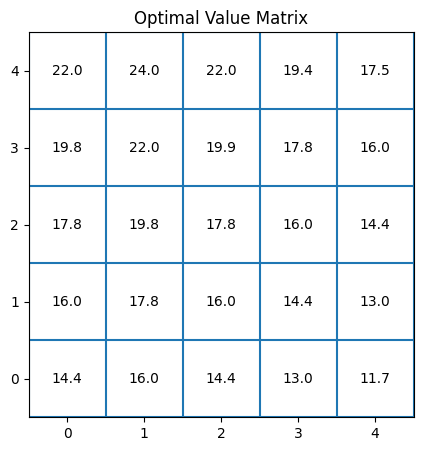

In [6]:
goal_coords = []
plot_matrix(value_function, goal_coords, title='Optimal Value Matrix')


remeber that the state space for this grid is index of each block location

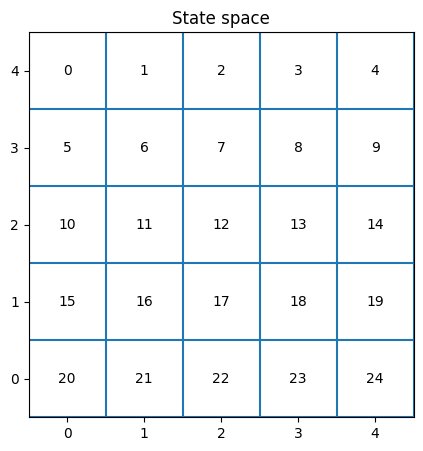

In [7]:
S = np.arange(0, 25).reshape(5, 5)
goal_coords = []
plot_matrix(S, goal_coords, title='State space')


The policy is desinged such that it should only return 4 posible locations arrow for each location in the grid  
0: right  <br>
1: down  <br>
2: left  <br>
3: up  <br>

In [8]:
import random
def all_left_policy(observation,value_function):
  return [2]

def all_right_policy(observation,value_function):
  return [0]

def up_down_policy(observation,value_function):
  return [1,3]

def random_policy(observation,value_function):
  return [random.choice([0,1,2,3])]

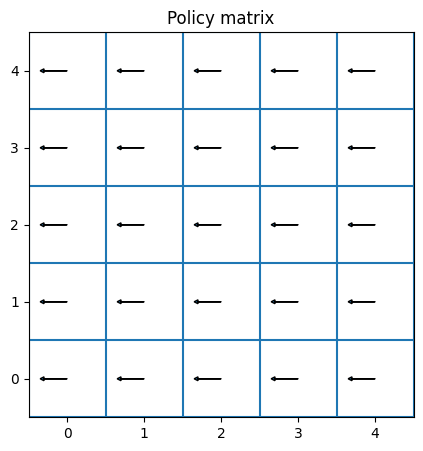

In [9]:
P =  test_policy(all_left_policy)
# Drawing a plot for the policy matrix with arrows; In one cell there can be the maximum of 4 arrows each indicating the action an agent can take
plot_policy_matrix(P, S, goal_coords, title='Policy matrix')

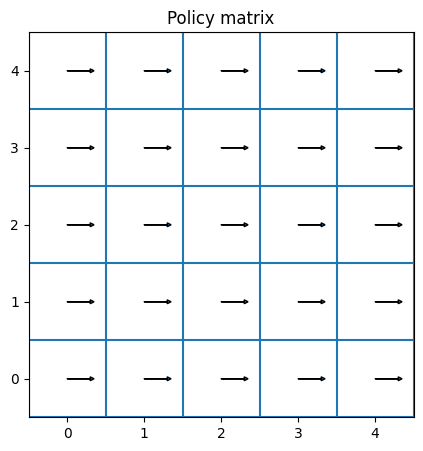

In [10]:
P =  test_policy(all_right_policy)
# Drawing a plot for the policy matrix with arrows; In one cell there can be the maximum of 4 arrows each indicating the action an agent can take
plot_policy_matrix(P, S, goal_coords, title='Policy matrix')

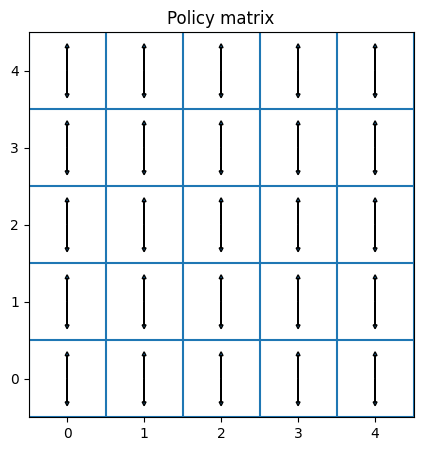

In [11]:
P =  test_policy(up_down_policy)
# Drawing a plot for the policy matrix with arrows; In one cell there can be the maximum of 4 arrows each indicating the action an agent can take
plot_policy_matrix(P, S, goal_coords, title='Policy matrix')

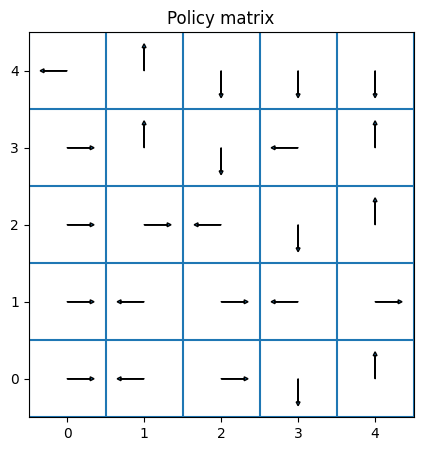

In [12]:
P =  test_policy(random_policy)
# Drawing a plot for the policy matrix with arrows; In one cell there can be the maximum of 4 arrows each indicating the action an agent can take
plot_policy_matrix(P, S, goal_coords, title='Policy matrix')

## Writing Your own Policy

In [13]:
# write your policy here. Remember the policy takes a the optimum value function at each location in the grid and tries to guide the player to the optimum place to reach the highest possible rewards.
import numpy as np

# Create a 2D NumPy array

# this function return the indices of the max value
def indices_of_max_values(arr):
    max_value = np.max(arr)
    indices = np.where(arr == max_value)[0]
    return indices

 # the use of this function is to give you the sourroding elements to each state.
 # In case something was not clear I advice you to use print function and see each step output.
def get_neighbor(array_2d,state):

  # create a mapping table
  states = np.array(range(25)).reshape(5,5)
  # find row and col of each state, you can use this or day1 method
  row = np.where(states == state)[0][0]
  col =  np.where(states == state)[1][0]

  # Get the neighboring elements
  top = array_2d[row - 1, col] if row - 1 >= 0 else 0  # element above
  bottom = array_2d[row + 1, col] if row + 1 < array_2d.shape[0] else 0  # element below
  left = array_2d[row, col - 1] if col - 1 >= 0 else 0  # element to the left
  right = array_2d[row, col + 1] if col + 1 < array_2d.shape[1] else 0  # element to the right

  return right, bottom, left, top

def policy(observation,value_function):
  action = indices_of_max_values(get_neighbor(value_function,observation))
  #action is value indicate the arrow position.  return a list for the direction
  return action

Now is to test your policy, remeber the ideal answer is to get this shape:

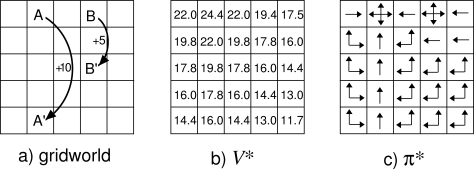

It means from whichever location you start, if you want to maximize your reward, follow these directions.

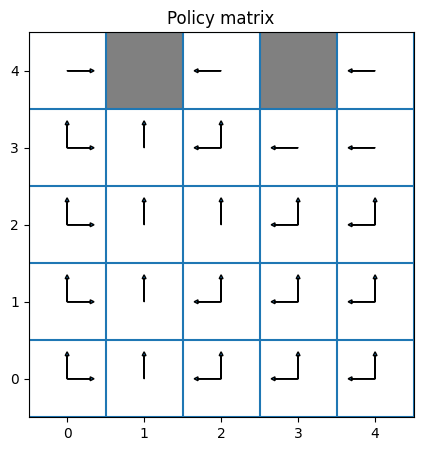

In [14]:
P =  test_policy(policy)
goal_coords = [(0,1),(0,3)]
# Drawing a plot for the policy matrix with arrows; In one cell there can be the maximum of 4 arrows each indicating the action an agent can take
plot_policy_matrix(P, S, goal_coords, title='Policy matrix')

# Frozen Lake Example

Frozen lake is a toy text environment involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake.

We can also set the lake to be slippery so that the agent does not always move in the intended direction. \but here, we will only look at the non-slippery case. But you are welcome to try the slippery one.

You can read more about the environment [lake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/).

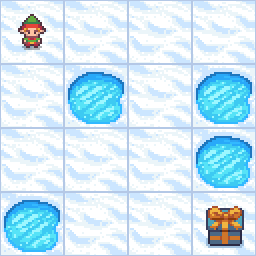

In [1]:
!pip install gym==0.26.2

In [2]:
import gym
import numpy as np

In [3]:
# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob
import base64, io, os
import random
os.environ['SDL_VIDEODRIVER']='dummy'
os.makedirs("video", exist_ok=True)

def show_video(env_name):
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = 'video/{}.mp4'.format(env_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def show_video_of_model(env_name, env, policy, max_steps=10000):
    vid = video_recorder.VideoRecorder(env, path="video/{}.mp4".format(env_name))
    state, _ = env.reset()
    done = False
    for t in range(max_steps):
        vid.capture_frame()
        value_function=np.array([0.59049, 0.6561, 0.729, 0.6561, 0.6561, 0, 0.81, 0, 0.729, 0.81, 0.9, 0, 0, 0.9, 1, 1]).reshape(4,4)
        action = policy(state,value_function)
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        print(f"state: {state}, action: {action}",next_state, reward, done)
        state = next_state
        if done:
            break

    vid.close()
    env.close()

## Creating the environment

In [4]:
env_2d = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")


Now given the value function you should use it such that your agent reach the goal every time.

In [5]:
value_function=np.array([0.59049, 0.6561, 0.729, 0.6561, 0.6561, 0, 0.81, 0, 0.729, 0.81, 0.9, 0, 0, 0.9, 1, 1]).reshape(4,4)
value_function

array([[0.59049, 0.6561 , 0.729  , 0.6561 ],
       [0.6561 , 0.     , 0.81   , 0.     ],
       [0.729  , 0.81   , 0.9    , 0.     ],
       [0.     , 0.9    , 1.     , 1.     ]])

Remeber that we have 16 states, i.e 16 blocks in the map, and 4 actions

In [6]:
env_2d.observation_space

Discrete(16)

In [7]:
env_2d.action_space


Discrete(4)

In [9]:


# this function return the indices of the max value
def indices_of_max_values(arr):
    max_value = np.max(arr)
    #print(max_value,arr)
    indices = np.where(arr == max_value)[0]
    return indices

 # the use of this function is to give you the sourroding elements to each state.
 # In case something was not clear I advice you to use print function and see each step output.
def get_neighbor(array_2d,state):

  # create a mapping table
  states = np.array(range(16)).reshape(4,4)
  # find row and col of each state, you can use this or day1 method
  row = np.where(states == state)[0][0]
  col =  np.where(states == state)[1][0]

  # Get the neighboring elements
  top = array_2d[row - 1, col] if row - 1 >= 0 else 0  # element above
  bottom = array_2d[row + 1, col] if row + 1 < array_2d.shape[0] else 0  # element below
  left = array_2d[row, col - 1] if col - 1 >= 0 else 0  # element to the left
  right = array_2d[row, col + 1] if col + 1 < array_2d.shape[1] else 0  # element to the right

  return right, bottom, left, top


# in the previous example 0 was used to go for right, however, here it is used for left that is why I'm using maping.
# The example you solved move clock-wise from the postive X-axis, whereas in gym it moves anit-clockwise from the negative X-axis.
# that is why we need this mapping function

def custom_mapping(x):
    if x == 0:
        return 2
    elif x == 1:
        return 1
    elif x == 2:
        return 0
    else:
        return x


def policy(observation,value_function):
  action = indices_of_max_values(get_neighbor(value_function,observation))
  #action is value indicate the arrow position. return a list for the direction
  return custom_mapping(random.choice(action))


In [10]:
show_video_of_model("lake", env_2d, policy, max_steps=10000)

state: 0, action: 2 1 0.0 False
state: 1, action: 2 2 0.0 False
state: 2, action: 1 6 0.0 False
state: 6, action: 1 10 0.0 False
state: 10, action: 1 14 0.0 False
state: 14, action: 2 15 1.0 True
Moviepy - Building video video/lake.mp4.
Moviepy - Writing video video/lake.mp4



Moviepy - Done !
Moviepy - video ready video/lake.mp4


In [11]:
show_video("lake")